<a href="https://colab.research.google.com/github/ErikMayerPSU/AuroraNSL_2024/blob/main/Code/viewline/Plot_OP_13_Aurorasaurus_and_view_line_2025_0409_1100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install aacgmv2

In [29]:
import logging; logging.basicConfig(level=logging.INFO)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import aacgmv2 as aacgmv2

import pandas as pd

import numpy as np

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

In [30]:
data = [[43.1419945,	-77.62689505, 1, '2015-03-18 02:00:00+00'], [43.07432708,	-77.08215706, 1, '2015-03-18 02:00:00+00'], [44.75479816,	-85.64451196, 1, '2015-03-18 02:00:00+00'],
        [45.47064381,	-93.73595456, 1, '2015-03-18 02:00:00+00'], [56.721425,	-111.3920839, 1, '2015-03-18 02:00:00+00'], [49.27290253,	-96.52831503, 1, '2015-03-18 02:00:00+00'],
        [44.48052241,	-81.38310197, 1, '2015-03-18 02:00:00+00'], [45.08066817,	-87.65610678, 1, '2015-03-18 02:00:00+00']]

df_aurorasaurus = pd.DataFrame(data, columns=['st_y', 'st_x', 'See_Aurora', 'time_start'])

print(df_aurorasaurus)

        st_y        st_x  See_Aurora              time_start
0  43.141995  -77.626895           1  2015-03-18 02:00:00+00
1  43.074327  -77.082157           1  2015-03-18 02:00:00+00
2  44.754798  -85.644512           1  2015-03-18 02:00:00+00
3  45.470644  -93.735955           1  2015-03-18 02:00:00+00
4  56.721425 -111.392084           1  2015-03-18 02:00:00+00
5  49.272903  -96.528315           1  2015-03-18 02:00:00+00
6  44.480522  -81.383102           1  2015-03-18 02:00:00+00
7  45.080668  -87.656107           1  2015-03-18 02:00:00+00


In [31]:
# Converting column data from CSV to lists
xcoords = df_aurorasaurus['st_x'].tolist()
ycoords = df_aurorasaurus['st_y'].tolist()
date_time = pd.to_datetime(df_aurorasaurus['time_start'])  #Store date and time in a variable

# Function to convert coordinates (Geo to AACGM)
def convert_to_aacgm(geo_lat, geo_lon, altitude, dtime):
    aacgm_lat, aacgm_lon, aacgm_r = aacgmv2.wrapper.convert_latlon(
        geo_lat, geo_lon, altitude, dtime, method_code='G2A'
    )
    return aacgm_lat, aacgm_lon, aacgm_r

# Lists to store results
aacgm_latitudes = []
aacgm_longitudes = []
aacgm_radii = []
mlt_values = []

# Convert each coordinate with corresponding time
for lat, lon, time in zip(ycoords, xcoords, date_time):
    out_lat, out_lon, out_r = convert_to_aacgm(lat, lon, 0, time)  #Assuming altitude = 0
    aacgm_latitudes.append(out_lat)
    aacgm_longitudes.append(out_lon)
    aacgm_radii.append(out_r)

    # Convert AACGM longitude to MLT
    mlt = aacgmv2.convert_mlt(out_lon, time, m2a=False)[0]
    mlt_values.append(mlt)

temp = pd.DataFrame({
    'ML': aacgm_latitudes,
    'MLT': mlt_values
}, index=df_aurorasaurus.index)  # Align index with original DataFrame

# Concatenate the original and new DataFrames horizontally
df_aurorasaurus = pd.concat([df_aurorasaurus, temp], axis=1)

df_aurorasaurus


,st_y,st_x,See_Aurora,time_start,ML,MLT
0,43.141995,-77.626895,1,2015-03-18 02:00:00+00,52.457205,20.979171
1,43.074327,-77.082157,1,2015-03-18 02:00:00+00,52.330766,21.029813
2,44.754798,-85.644512,1,2015-03-18 02:00:00+00,54.516595,20.221009
3,45.470644,-93.735955,1,2015-03-18 02:00:00+00,55.005057,19.447649
4,56.721425,-111.392084,1,2015-03-18 02:00:00+00,63.796204,17.707263
5,49.272903,-96.528315,1,2015-03-18 02:00:00+00,58.491131,19.166510
6,44.480522,-81.383102,1,2015-03-18 02:00:00+00,54.077348,20.628910
7,45.080668,-87.656107,1,2015-03-18 02:00:00+00,54.844144,20.027988


In [32]:
#Round the values of ML to the nearest 0.5 value so they fit in the established bins
df_aurorasaurus['ML'] = (df_aurorasaurus['ML'] * 2).round() / 2

#Round the values of MLT to the nearest 0.5 value so they fit in the established bins
df_aurorasaurus['MLT'] = (df_aurorasaurus['MLT'] * 4).round() / 4

df_aurorasaurus

,st_y,st_x,See_Aurora,time_start,ML,MLT
0,43.141995,-77.626895,1,2015-03-18 02:00:00+00,52.5,21.00
1,43.074327,-77.082157,1,2015-03-18 02:00:00+00,52.5,21.00
2,44.754798,-85.644512,1,2015-03-18 02:00:00+00,54.5,20.25
3,45.470644,-93.735955,1,2015-03-18 02:00:00+00,55.0,19.50
4,56.721425,-111.392084,1,2015-03-18 02:00:00+00,64.0,17.75
5,49.272903,-96.528315,1,2015-03-18 02:00:00+00,58.5,19.25
6,44.480522,-81.383102,1,2015-03-18 02:00:00+00,54.0,20.75
7,45.080668,-87.656107,1,2015-03-18 02:00:00+00,55.0,20.00


In [33]:
# OP-13 data

df_eflux = pd.read_csv(r"https://raw.githubusercontent.com/ErikMayerPSU/AuroraNSL_2024/main/data/St%20patrick's%20day%202015/Eflux/20150318_0200UT_Eflux_e%2Call.txt", header=None, skiprows=1, nrows=7680, sep='\s+', on_bad_lines='skip')

# Define new headers
eflux_headers = ["MLT", "ML", "[mW m^-2]"]

# Set the column headers
df_eflux.columns = eflux_headers

#add column for visibility threshold (VT) T/F
df_eflux["VT"]= 0

#Set VT to 1 or 0 based on aurora visibility threshold of 1 mW m^-2
df_eflux.loc[df_eflux["[mW m^-2]"]>=1, "VT"] = 1

#add a column for the equatorial boundry (EB) and viewline (VL)
df_eflux["EB"] = 0 #initialize as 0 not "0"
df_eflux["VL"] = 0

last_j = 0 #initialize last j

#apply viewline equation to OP-13 data
for i in range(len(df_eflux["MLT"])):

  #find first instance of visibility threshold being 1 for each MLT value 0-24
  selected_rows = df_eflux.loc[(df_eflux["MLT"] == i/4) & (df_eflux["VT"] >= 1)]

  # Check that there is an instance of the VT being 1 in this value of MLT
  if not selected_rows.empty:
    j = selected_rows.index[0]

    #2/13/25 added if statement to attempt to remove outliars

    if (abs(df_eflux.loc[last_j,"ML"]-df_eflux.loc[j,"ML"]) < 1):



    # Set the EB column to show the first instance of visibility threshold being
    # 1 for each MLT value 0-24
      df_eflux.loc[j,"EB"] = 1
    # Set the viewline based on the EB VL equation
      df_eflux.loc[j-8,"VL"] = 1

    last_j = j

# Filter to get the MLT and ML coordinates of all rows where the VL is present
VL_df = df_eflux[df_eflux['VL'] == 1]
VL_df = VL_df[['MLT','ML']]

# Find missing values of MLT and add them to the VL dataframe with a ML of NaN
MLT_vals = df_eflux['MLT'].unique()
Missing_MLT = set(MLT_vals) - set(VL_df['MLT'])
VL_df = pd.concat([VL_df, pd.DataFrame({'MLT': list(Missing_MLT), 'ML': [np.nan] * len(Missing_MLT)})])

# Fix order and index
VL_df = VL_df.sort_values(by='MLT').reset_index(drop=True)


# Interpolate missing viewline points
# Use limit = 10 to avoid filling large gaps, such as the middle of the VL
VL_df = VL_df.interpolate(method='linear', axis=0, limit=10)
VL_df = VL_df.interpolate(method='linear', axis=0, limit_direction='both', limit_area='outside') # Ensure edges are filled

#Round the values of ML to the nearest 0.5 value so they fit in the established bins
VL_df['ML'] = (VL_df['ML'] * 2).round() / 2



#Create new row for interpolated VL in df_eflux
df_eflux['New_VL'] = 0

#Set New_VL to 1 for rows corresponding to the MLT and ML coordinates in VL_df
for i, row in VL_df.iterrows():
    mlt = row['MLT']
    ml = row['ML']
    if not pd.isna(ml):  # Skip rows where ML is NaN
        df_eflux.loc[(df_eflux['MLT'] == mlt) & (df_eflux['ML'] == ml), 'New_VL'] = 1

# Create an array of the New_VL column
array_eflux = df_eflux.to_numpy()
array_VIS = array_eflux[0:7680,6:7]

# Set visibilty to a "1" from the viewline to 90 MLT
for i in range(96):
    array_temp = array_VIS[(i*80):((i+1)*80),0:1]

    try:
        # Find the index of the first occurrence of 1 in array_temp
        idx = np.where(array_temp == 1)[0][0]  # Use np.where to find the index
        #print(idx)
        array_VIS[(i*80)+idx:((i+1)*80),0:1] = 1
        #for j in range(idx):
            #array_VL[i * 80 + (80 - j)] = 1 #Fixed index out of range error
            #print(i * 80 + (80 - j))
    except IndexError: #Changed to IndexError since np.where returns an empty array if the value is not found which leads to an IndexError
        logging.NullHandler

# Add the visibility array back to eflux_df
df_eflux['VIS'] = pd.DataFrame(array_VIS, columns=['VIS'])
df_eflux

,MLT,ML,[mW m^-2],VT,EB,VL,New_VL,VIS
0,0.00,50.0,0.009205,0,0,0,0,0.0
1,0.00,50.5,0.009303,0,0,0,0,0.0
2,0.00,51.0,0.005775,0,0,0,0,0.0
3,0.00,51.5,0.020590,0,0,0,0,0.0
4,0.00,52.0,0.000387,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
7675,23.75,87.5,0.023140,0,0,0,0,1.0
7676,23.75,88.0,0.022190,0,0,0,0,1.0
7677,23.75,88.5,0.023080,0,0,0,0,1.0
7678,23.75,89.0,0.016270,0,0,0,0,1.0


In [34]:
df_eflux['See_Aurora'] = np.nan

for i, row in df_aurorasaurus.iterrows():
    mlt = row['MLT']
    ml = row['ML']
    df_eflux.loc[(df_eflux['MLT'] == mlt) & (df_eflux['ML'] == ml), 'See_Aurora'] = 1

df_eflux

,MLT,ML,[mW m^-2],VT,EB,VL,New_VL,VIS,See_Aurora
0,0.00,50.0,0.009205,0,0,0,0,0.0,NaN
1,0.00,50.5,0.009303,0,0,0,0,0.0,NaN
2,0.00,51.0,0.005775,0,0,0,0,0.0,NaN
3,0.00,51.5,0.020590,0,0,0,0,0.0,NaN
4,0.00,52.0,0.000387,0,0,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
7675,23.75,87.5,0.023140,0,0,0,0,1.0,NaN
7676,23.75,88.0,0.022190,0,0,0,0,1.0,NaN
7677,23.75,88.5,0.023080,0,0,0,0,1.0,NaN
7678,23.75,89.0,0.016270,0,0,0,0,1.0,NaN


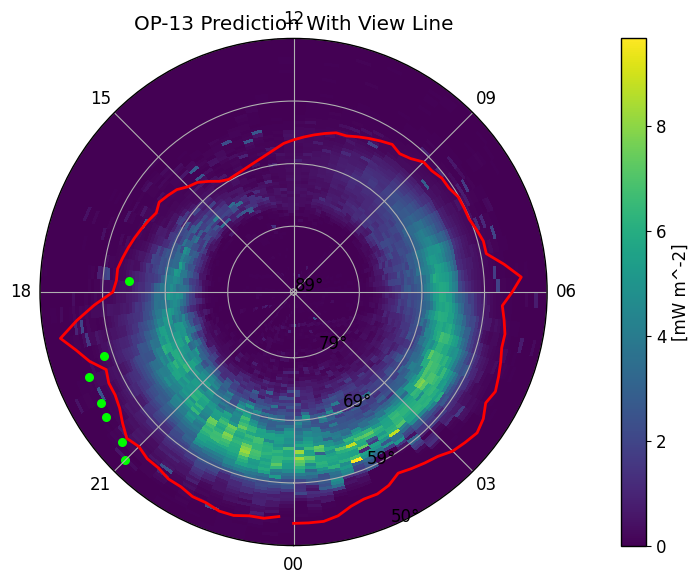

In [40]:
# Reshape into a grid (MLT=rows, ML=columns)
grid = df_eflux.pivot(index='MLT', columns='ML', values='[mW m^-2]')

# Convert MLT to radians
theta = np.deg2rad(grid.index * 15)  # 15° per hour

#Invert ML since the plot was backward
ml = grid.columns.values
ml_inverted = ml.max() - ml

# Extend edges for pcolormesh
theta_edges = np.append(theta, theta[0] + 2*np.pi)  # Close the loop (24h)
ml_edges = np.append(ml_inverted, ml_inverted[-1] + np.diff(ml_inverted)[0])  # Extend edges


# Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})
pc = ax.pcolormesh(
    theta_edges,
    ml_edges,
    grid.T,  # Transpose to match (ML, MLT)
    cmap='viridis',
    shading='auto'
)

ax.set_theta_zero_location('S')  # 0° at bottom
ax.set_theta_direction(1)       # Set correct direction for MLT

# Label MLT ticks
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax.set_xticklabels(['00', '03', '06', '09', '12', '15', '18', '21'])

# Label ML ticks
r_ticks = np.linspace(ml.min(), ml.max(), 5)
ax.set_yticks(ml.max() - r_ticks)
ax.set_yticklabels([f'{int(x)}°' for x in r_ticks])

# Add labels and colorbar
#ax.set_xlabel('Magnetic Local Time (MLT)')
#ax.set_ylabel('Magnetic Latitude (ML)')
plt.colorbar(pc, label='[mW m^-2]', pad=0.1)

# Add view line to plot

# Get the geomagnetic coordinates of view line
view_points = df_eflux[df_eflux['New_VL'] == 1]
view_MLT = view_points['MLT'].values
view_ML = view_points['ML'].values

# Convert to polar coordinates (same as main plot)
view_theta = np.deg2rad(view_MLT * 15)  # MLT to radians
view_ml_inverted = ml.max() - view_ML   # Invert ML

# Plot the view line in red
ax.plot(
    view_theta, view_ml_inverted,
    color='red', linewidth=2,
)

# Add the Aurorasaurus Data

# Get the geomagnetic coordinates of Aurorasaurus Data
see_points = df_eflux[df_eflux['See_Aurora'] == 1]
see_MLT = see_points['MLT'].values
see_ML = see_points['ML'].values

# Convert to polar coordinates (same as main plot)
see_theta = np.deg2rad(see_MLT * 15)  # MLT to radians
see_ml_inverted = ml.max() - see_ML   # Invert ML

# Plot the view line in red
ax.scatter(
    see_theta, see_ml_inverted,
    color='lime', s=30,
)


plt.title('OP-13 Prediction With View Line')
plt.tight_layout()
plt.show()